![logo](./img/TheBridge_RL.png)

# Introducción a los entornos de prueba de aprendizaje por refuerzo (el Gym) (I)

## Contenidos

* [Motivacion](#Motivacion)  
* [Gym de OpenAI](#Gym-de-OpenAI)  
* [Primeros pasos con Gym](#Primeros-pasos-con-Gym)  
* [Steps, Episodes y Actions (pasos, episodios y acciones)](#Steps,-Episodes-y-Actions-(pasos,-episodios-y-acciones))  
* [Visualizacion (*Rendering*)](#Visualizacion-(*Rendering*))  


### Motivacion
  
[al indice](#Contenidos)  
Uno de los elementos principales de un sistema de aprendizaje por refuerzo es el entorno. Por tanto, tendremos que disponer de él.  

Podría pensarse que cuanto más real, mejor, pero los entornos reales tienen también serias limitaciones.  

Considera el caso de que queramos entrenar un robot de rescate en la montaña. Podemos pensar en entrenarlo en una montaña de verdad, pero:
* Si el robot se cae por una ladera no hay forma de hacer Ctrl+Z.
* Estamos limitados al tiempo real, es decir si queremos que el robot aprenda en un recorrido de 100Km, cada intento llevará el tiempo que le lleve al robot recorrer 100Km. No podemos acelerar el tiempo.

Por eso, empleamos simuladores de entornos y por sus características, reglas y acciones concretas, que facilitan su simulación, se emplean videojuegos.

### Gym de OpenAI  
[al indice](#Contenidos)  


Dentro de los posibles simuladores de entornos el más conocido es Gym(*) de OpenAI. Este simulador permite testar, desarrollar y comparar algoritmos de aprendizaje por refuerzo (desde los clásicos juegos de Atari a entornos "reales" en 2D y 3D, pasando por varios juegos de mesa).

Uno de los puntos fuertes es que se emplea una interfaz única para todos los entornos, lo que permite escribir algoritmos genéricos. Sólo necesitaras cambiar una línea de código para probarlo en cualquiera de los entornos disponibles.   

Comencemos!!!


### Primeros pasos con Gym  
[al indice](#Contenidos)  


Lo primero es importar el módulo

In [1]:
#!pip install gym (minimo para seguir la clase)
#!pip install gym[atari] # para cargar los entornos de atari
#!pip install ale-py #Puede que necesites esto
#!pip install pygame #y esto


In [2]:
!pip install gymnasium

In [3]:
!python.exe -m pip install --upgrade pip

In [4]:
!pip install ale-py
!pip install pygame

In [5]:
import gymnasium as gym

Para cargar un entorno sólo tienes que teclear lo siguiente, indicando el nombre del entorno que se quiera simular

In [6]:
env=gym.make("MountainCar-v0", render_mode="rgb_array")

En este caso estamos instanciando un entorno de un juego cuyo objetivo es mover un vagón en el fondo de un valle de forma que alcance la parte superior de una colina.

<img src= "./img/mountain_car_example.png" width = 500 />

Si queremos ver todos los entornos disponibles sólo tenemos que tecelar lo siguiente

In [7]:
envs = gym.envs.registry
sorted(envs.keys())

['Acrobot-v1',
 'Ant-v2',
 'Ant-v3',
 'Ant-v4',
 'Ant-v5',
 'BipedalWalker-v3',
 'BipedalWalkerHardcore-v3',
 'Blackjack-v1',
 'CarRacing-v3',
 'CartPole-v0',
 'CartPole-v1',
 'CliffWalking-v1',
 'CliffWalkingSlippery-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'GymV21Environment-v0',
 'GymV26Environment-v0',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'HalfCheetah-v4',
 'HalfCheetah-v5',
 'Hopper-v2',
 'Hopper-v3',
 'Hopper-v4',
 'Hopper-v5',
 'Humanoid-v2',
 'Humanoid-v3',
 'Humanoid-v4',
 'Humanoid-v5',
 'HumanoidStandup-v2',
 'HumanoidStandup-v4',
 'HumanoidStandup-v5',
 'InvertedDoublePendulum-v2',
 'InvertedDoublePendulum-v4',
 'InvertedDoublePendulum-v5',
 'InvertedPendulum-v2',
 'InvertedPendulum-v4',
 'InvertedPendulum-v5',
 'LunarLander-v3',
 'LunarLanderContinuous-v3',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Pusher-v2',
 'Pusher-v4',
 'Pusher-v5',
 'Reacher-v2',
 'Reacher-v4',
 'Reacher-v5',
 'Swimmer-v2',
 'Swimmer-v3',
 'Swimmer-v4',
 'Swimmer-v5',
 '

Una vez cargado un entorno, lo primero que hacemos es inicializarlo:

In [8]:
env.reset()

(array([-0.55863327,  0.        ], dtype=float32), {})

Y nos devuelve un array con las observaciones, e información adicional. 
En este entorno, las observaciones son la posición en el eje-x, y la velocidad del vagón.

### Steps, Episodes y Actions (pasos, episodios y acciones)  
[al indice](#Contenidos)  


En el contexto del aprendizaje por refuerzo, nos quedan dos conceptos por conocer:
- Step (Paso): La ejecución de una acción de un agente sobre un entorno que hace que este devuelva las observaciones del nuevo estado y la recompensa
- Episode (Episodio): Conjunto completo de pasos (steps) que conforman un ciclo completo de entrenamiento, lo que viene a ser una "partida"

En el caso de Gym, la forma de ejecutar un step, es la siguiente:

In [ ]:
env.step(action) #no ejecutar la celda

¿Y qué acciones?

In [11]:
env.action_space

Discrete(3)

Nos dice que hay tres acciones, discretas, es decir, accion 0, acción 1, y acción 2
Si consultamos la documentación de OpenAI Gym:
  
0: Acelerar a la izquierda  
1: No hacer nada  
2: Acelerar a la derecha  

Si queremos más información, en la misma documentación podemos ver que fórmula sigue el entorno para simular la aceleración o, importante cual es el criterio de recompensa (en este caso castigo):
- Como el objetivo es llegar a la cima lo antes posible, a cada acción le corresponde siempre una recompensa de -1. Este es un caso en el que querremos minimizar el reward de cada episodio.

Ahora que conocemos las acciones, ejecutemos un step como si fueramos el agente:

In [12]:
env.step(0)

(array([-0.559371  , -0.00073772], dtype=float32), -1.0, False, False, {})

Nos ha devuelto cinco valores:
* __las observaciones__ del nuevo estado, es decir la posición en el eje-x y la velocidad con su signo (como hemos indicado que acelere a la izquierda y estaba quieto ha cogido velocidad "negativa", hacia la izquierda)
* __el reward__ que como hemos comentado siempre es -1
* __un flag de terminated__ nos indica si el episodio se ha terminado porque se ha alcanzado alguna de las condiciones de parada (en nuestro caso si se ha llegado a la cima)
* __un flag de truncado__ es un flag especial por si hay problemas con el entorno y debe reinicializarse
* __información adicional__ que se emplea en algunos entornos, como por ejemplo los juegos de Atari para indicarnos las vidas que le quedan al agente

Típicamente, ejecutaremos el step almacenando su salida en diferentes variables, algo como:

In [13]:
obs,reward,done,truncated,info = env.step(0)

In [14]:
print(obs)

[-0.56084096 -0.00146995]


### Visualizacion (*Rendering*)  
[al indice](#Contenidos)  


Con los comandos vistos ya podríamos programar un ciclo completo de entrenamiento de aprendizaje por refuerzo, pero de una forma bastante árida y con poca capacidad por parte de un ser humano de poder "ver" cómo está evolucionando.

In [15]:
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Lo que nos ha devuelto es el contenido de la pantalla pixel a pixel que corresponde al estado generado por nuestra acción. Esto es así porque cuando creamos el entorno utilizamos el argumento render_mode con el valor "rgb_array":   
```python
env = gym.make("MountainCar-v0", render_mode = "rgb_array")
```

Vamos a emplear un método que utiliza una librería como matplotlib que funciona con cualquier sistema operativo

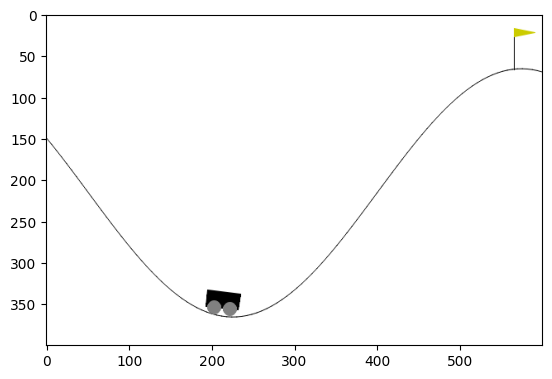

In [16]:
import matplotlib.pyplot as plt
img=env.render()
plt.imshow(img)

Ejecutemos varios steps seguidos acelerando hacia la izquierda y veamos el resultado final

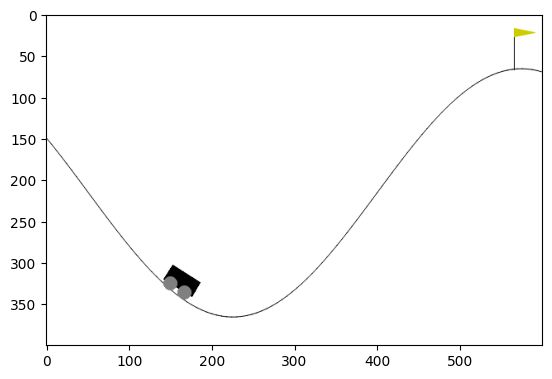

In [17]:
for i in range (100):
    obs,reward,done,truncated,info = env.step(0)
    
img = env.render()
plt.imshow(img)